# Region of interest

In [1]:
# load helper functions
%run -i "0. Functions_Clases Pipeline.py"

# Load Camera calibration params
edge_images = pickle.load(open( "pickle_data/edge_images.p", "rb" ) )

[NbConvertApp] Converting notebook 0. Functions_Clases Pipeline.ipynb to script
[NbConvertApp] Writing 20331 bytes to 0. Functions_Clases Pipeline.py


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

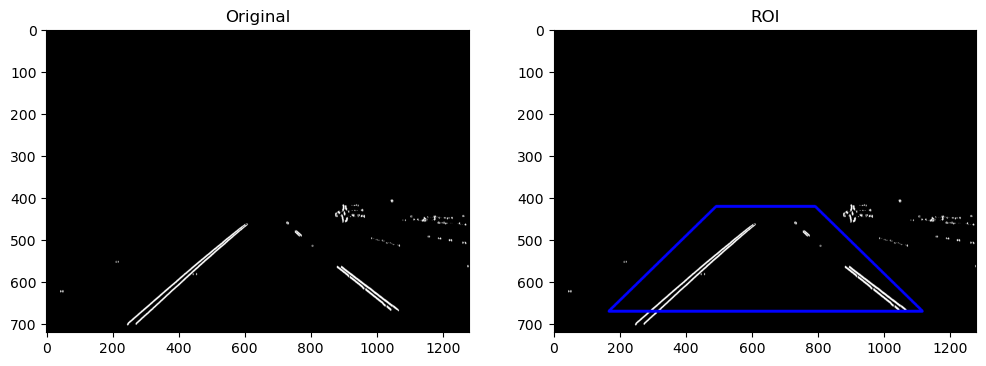

In [2]:
#Test function
edge_image = edge_images[4]

imagesROI=[]
titlesROI=[]

ysize =edge_image.shape[0]
xsize =edge_image.shape[1]

ROI_upperWidth = 300 #Width of the upper horizontal straight in px
ROI_upperHeight = 300 #Height of the upper horizontal straight from the bottom of the image in px
ROI_lowerWidth = 950 #Width of the lower horizontal straight in px
ROI_lowerHeight = 50  #Height of the lower horizontal straight  from the bottom of the image in px      
    
limitLL = ((xsize/2)-(ROI_lowerWidth/2),ysize-ROI_lowerHeight);
limitLR = (xsize - ((xsize/2)-(ROI_lowerWidth/2)),ysize-ROI_lowerHeight);
limitUL = ((xsize/2)-(ROI_upperWidth/2), ysize-ROI_upperHeight);
limitUR = ((xsize/2)+(ROI_upperWidth/2), ysize-ROI_upperHeight);
vertices = np.array([[limitLL,limitUL,limitUR , limitLR]], dtype=np.int32)

imageROI = region_of_interest(edge_image,vertices, overplot=True)

imagesROI.append(edge_image);titlesROI.append("Original");
imagesROI.append(imageROI);titlesROI.append("ROI");
    
displayListImages(imagesROI,cols=2,titles=titlesROI, figSize=[12,2], cmap='gray')

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

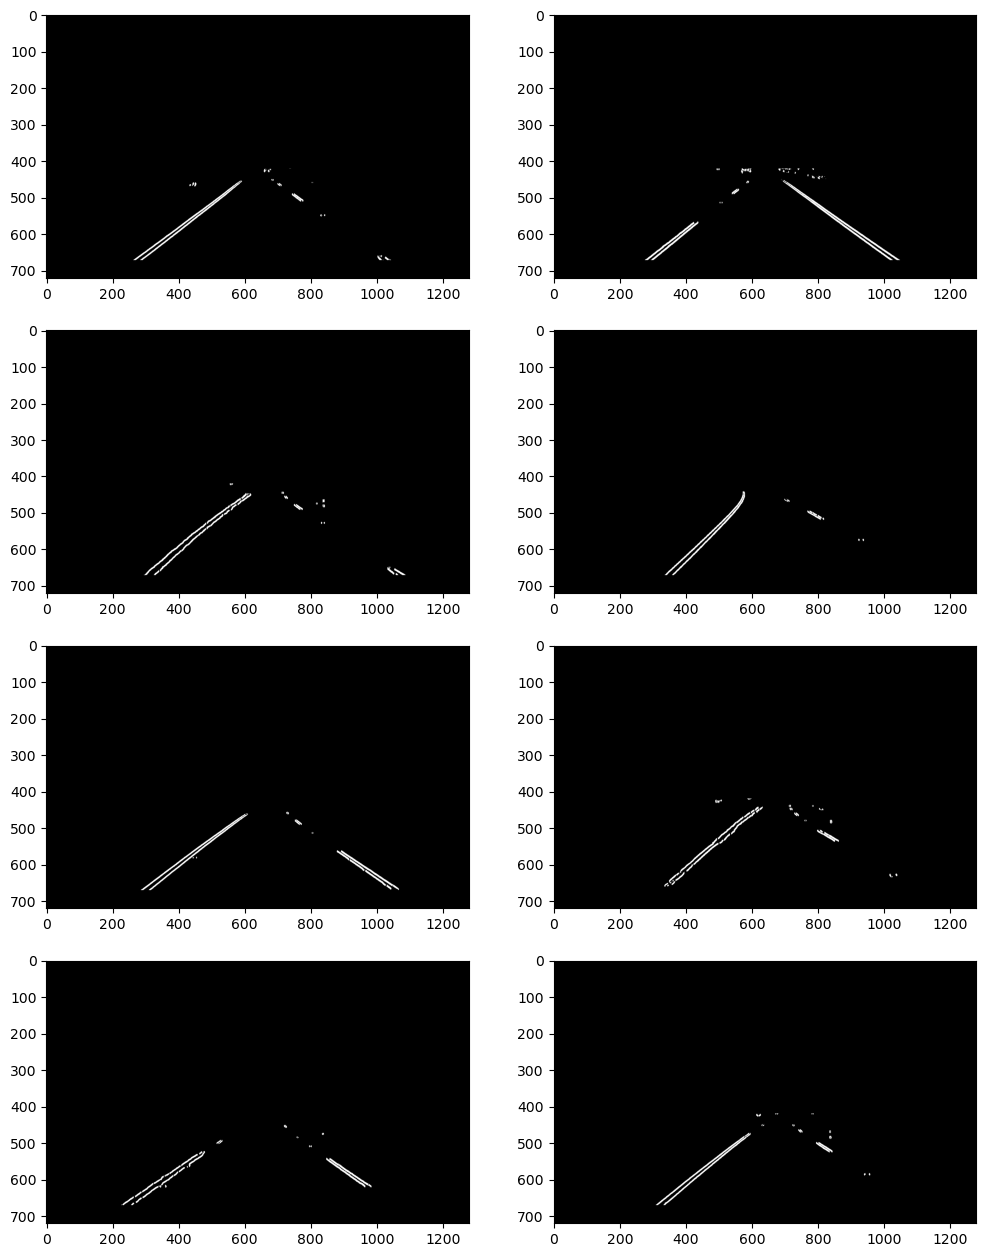

In [3]:
roi_images = []

for img in edge_images:
    imageROI = region_of_interest(img,vertices)
    roi_images.append(imageROI)
        
displayListImages(roi_images,cols=2,cmap='gray',figSize=[12,8])

## Dump data

In [4]:
pickle.dump( roi_images, open( "pickle_data/roi_images.p", "wb" ) )

***

## Images Report

In [5]:
path = './output_images/'

write_name = 'imagesROI_'+str(1)+'.jpg'
cv2.imwrite(os.path.join(path , write_name), imagesROI[1])

True